# Car Accidents Italy

Notebook for data analysis for car accidents in Italy.

**note** 
- Il dataset che avevamo trovato era delle _tabelle_, ovvero dei dati già analizzati. Si mostra quindi con dei metadati.
- Il dataset è troppo pesante per GitHub. È stato quindi messo in `.gitignore`.

**cose da fare**
- Calcolare indici di eterogeneità di Gini
- Controllare se sotto Natale ci sono più incidenti
- Dimostrare che le donne **non** sono più pericolose al volante degli uomini
- Morti su tipo di incidente, anche per età. 
- Stabilire il sesso con più morti.
- Maschi, femmine che si schiantano da soli.


In [1]:
dataset_proj <- read.csv("dataset/dataset progetto.csv", sep=';')

In [2]:
dataset_proj

anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,⋯,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<fct>,<fct>,<int>
17,7,30,6,2,6,27,12,2,1,⋯,0,0,0,0,6,NA,6,12,900,2
17,7,66,1,2,3,26,12,2,1,⋯,0,0,0,0,1,NA,13,0,0,3
17,7,43,3,2,6,26,12,2,1,⋯,0,0,0,0,1,NA,15,69,100,4
17,7,24,1,2,8,0,12,2,1,⋯,0,0,0,0,1,NA,17,0,0,4
17,7,65,1,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,10,0,0,4
17,7,73,7,2,6,26,12,2,1,⋯,0,0,0,0,2,NA,19,0,0,3
17,7,3,5,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,15,0,0,1
17,7,65,4,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,20,0,0,2
17,7,3,5,2,1,0,12,1,1,⋯,0,0,0,0,1,NA,16,0,0,2


In [3]:
cat("Grandezza del dataset:",ncol(dataset_proj),"x",nrow(dataset_proj))

Grandezza del dataset: 117 x 174933

Andiamo a prendere un campione di dal dataset che viene fornito. Per modificare la grandezza del campione, si cambi `SAMPLE_SIZE`.

In [4]:
SAMPLE_SIZE = 20000

In [5]:
sample_rows <- sample(nrow(dataset_proj), SAMPLE_SIZE)

In [6]:
sample_data = dataset_proj[sample_rows,]

In [7]:
names(sample_data)

[1] "anno"                          "provincia"                    
  [3] "comune"                        "giorno"                       
  [5] "organo_di_rilevazione"         "localizzazione_incidente"     
  [7] "denominazione_della_strada"    "tronco_di_strada_o_autostrada"
  [9] "tipo_di_strada"                "pavimentazione"               
 [11] "intersezione_o_non_interse3"   "fondo_stradale"               
 [13] "segnaletica"                   "condizioni_meteorologiche"    
 [15] "natura_incidente"              "tipo_veicolo_a"               
 [17] "tipo_veicoli__b_"              "tipo_veicolo__c_"             
 [19] "veicolo__a____circostanze_10"  "veicolo__a____circostanze_11" 
 [21] "veicolo__b____circostanze_13"  "veicolo__b____circostanze_14" 
 [23] "veicolo__a___anno_immatric18"  "immatricolazione_veicolo__b_" 
 [25] "immatricolazione_veicolo__c_"  "veicolo__a___et__conducente"  
 [27] "veicolo__a___sesso_conducente" "veicolo__a___esito_conducente"
 [29] "veicolo__a___patente_condu29"  "veicolo__a___anno_rilascio30" 
 [31] "veicolo__a___passeggeri_an35"  "veicolo__a___et__passegger36" 
 [33] "veicolo__a___sesso_passegg37"  "veicolo__a___esito_passegg38" 
 [35] "veicolo__a___et__passegger39"  "veicolo__a___sesso_passegg40" 
 [37] "veicolo__a___esito_passegg41"  "veicolo__a___et__passegger42" 
 [39] "veicolo__a___sesso_passegg43"  "veicolo__a___esito_passegg44" 
 [41] "veicolo__a___et__passegger45"  "veicolo__a___sesso_passegg46" 
 [43] "veicolo__a___altri_passegg47"  "veicolo__a___altri_passegg48" 
 [45] "veicolo__a___altri_passegg49"  "veicolo__a___altri_passegg50" 
 [47] "veicolo__b___et__conducente"   "veicolo__b___sesso_conducente"
 [49] "veicolo__b___esito_conducente" "veicolo__b___patente_condu51" 
 [51] "veicolo__b___anno_rilascio52"  "veicolo__b___passeggeri_an57" 
 [53] "veicolo__b___et__passegger58"  "veicolo__b___sesso_passegg59" 
 [55] "veicolo__b___esito_passegg60"  "veicolo__b___et__passegger61" 
 [57] "veicolo__b___sesso_passegg62"  "veicolo__b___esito_passegg63" 
 [59] "veicolo__b___et__passegger64"  "veicolo__b___sesso_passegg65" 
 [61] "veicolo__b___esito_passegg66"  "veicolo__b___et__passegger67" 
 [63] "veicolo__b___sesso_passegg68"  "veicolo__b___altri_passegg69" 
 [65] "veicolo__b___altri_passegg70"  "veicolo__b___altri_passegg71" 
 [67] "veicolo__b___altri_passegg72"  "veicolo__c___et__conducente"  
 [69] "veicolo__c___sesso_conducente" "veicolo__c___esito_conducente"
 [71] "veicolo__c___patente_condu73"  "veicolo__c___anno_rilascio74" 
 [73] "veicolo__c___passeggeri_an79"  "veicolo__c___et__passegger80" 
 [75] "veicolo__c___sesso_passegg81"  "veicolo__c___esito_passegg82" 
 [77] "veicolo__c___et__passegger83"  "veicolo__c___sesso_passegg84" 
 [79] "veicolo__c___esito_passegg85"  "veicolo__c___et__passegger86" 
 [81] "veicolo__c___sesso_passegg87"  "veicolo__c___esito_passegg88" 
 [83] "veicolo__c___et__passegger89"  "veicolo__c___sesso_passegg90" 
 [85] "veicolo__c___altri_passegg91"  "veicolo__c___altri_passegg92" 
 [87] "veicolo__c___altri_passegg93"  "veicolo__c___altri_passegg94" 
 [89] "pedone_morto_1__sesso"         "pedone_morto_1__et_"          
 [91] "pedone_ferito_1__sesso"        "pedone_ferito_1__et_"         
 [93] "pedone_morto_2__sesso"         "pedone_morto_2__et_"          
 [95] "pedone_ferito_2__sesso"        "pedone_ferito_2__et_"         
 [97] "pedone_morto_3__sesso"         "pedone_morto_3__et_"          
 [99] "pedone_ferito_3__sesso"        "pedone_ferito_3__et_"         
[101] "pedone_morto_4__sesso"         "pedone_morto_4__et_"          
[103] "pedone_ferito_4__sesso"        "pedone_ferito_4__et_"         
[105] "altri_veicoli_coinvolti"       "morti_maschi_coinvolti_su_95" 
[107] "morti_femmine_coinvolti_su96"  "feriti_maschi_coinvolti_su97" 
[109] "feriti_femmine_coinvolti_s98"  "morti_entro_24_ore"           
[111] "morti_entro_30_giorni"         "feriti"                       
[113] "descrizione_strada"            "Ora"                          
[115] "chilo

In [8]:
attach(sample_data)

In [9]:
giorno <- factor(giorno)
levels(giorno) <- c("Lun", "Mar", "Mer", "Gio", "Ven", "Sab", "Dom")
incidenti_per_giorni = table(giorno)

In [10]:
levels(giorno)

[1] "Lun" "Mar" "Mer" "Gio" "Ven" "Sab" "Dom"

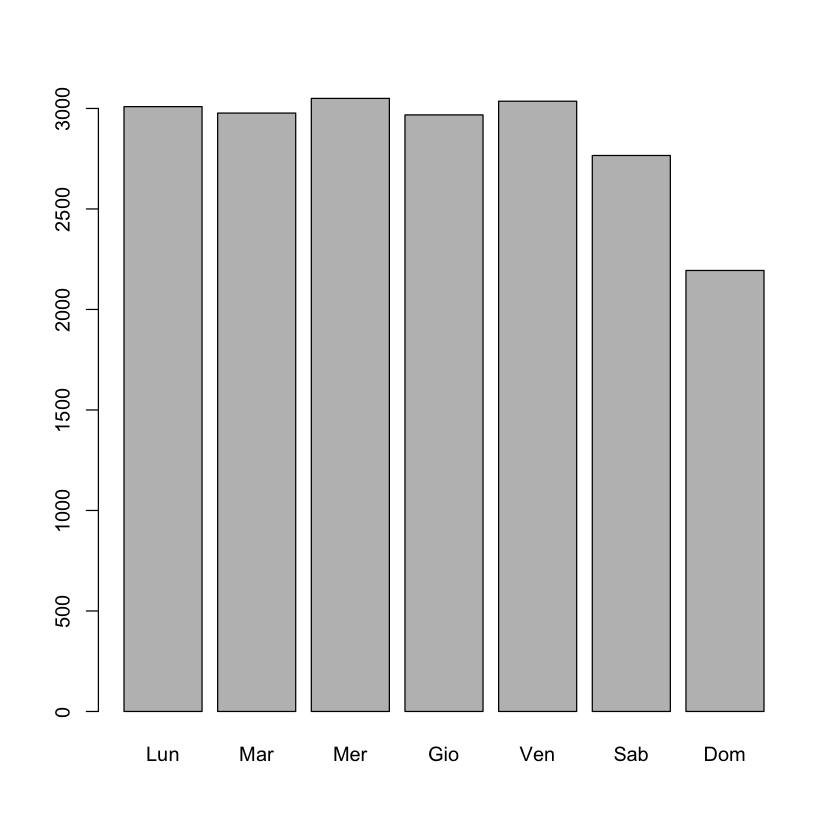

In [11]:
barplot(incidenti_per_giorni)

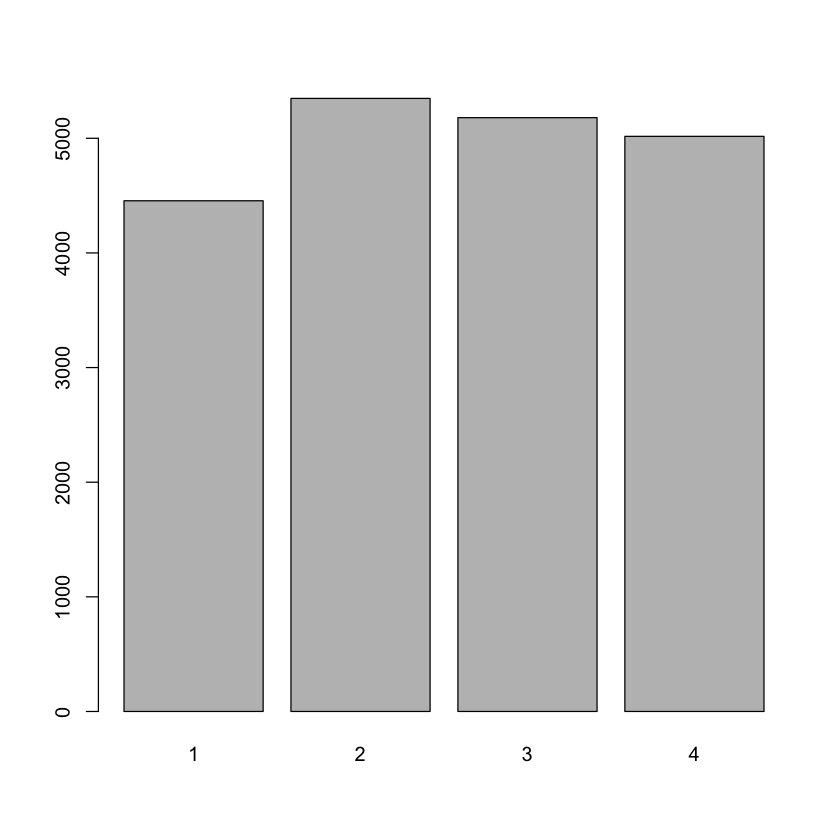

In [12]:
barplot(table(trimestre))

-----

Provo a creare una qualche tabella bivariata.

In [13]:
pavimentazione <- factor(pavimentazione)
levels(pavimentazione) <- c("good", "bad", "non-pav")

Provo a fare una nuova variabile per la localizzazione degli incidenti, nella quale distinguo solamente tra _urbana_, _extraurbana_ e _autostrada_. In questo modo si dovrebbe vedere meglio dove si ha una maggiore incidenza del fondo stradale messo male.

In [14]:
new_localizzazione_incidente = array(10, length(localizzazione_incidente))

In [15]:
for(i in 1:length(localizzazione_incidente))
{

    if(localizzazione_incidente[i] == 0 || localizzazione_incidente[i] == 1 || localizzazione_incidente[i] == 2 || localizzazione_incidente[i] == 3)    
    {
        new_localizzazione_incidente[i] = 0

    }
    if(localizzazione_incidente[i] == 4 || localizzazione_incidente[i] == 5 || localizzazione_incidente[i] == 6 || localizzazione_incidente[i] == 9)    
    {
        new_localizzazione_incidente[i] = 1
    }
    if(localizzazione_incidente[i] == 7)
    {
        new_localizzazione_incidente[i] = 2
    }
    
}

Controllo che effettivamente il numero di strade scartate coincida con quelle non considerate (ovvero `altro`).

In [16]:
length(which(new_localizzazione_incidente == 10)) == length(which(localizzazione_incidente==8))

[1] TRUE

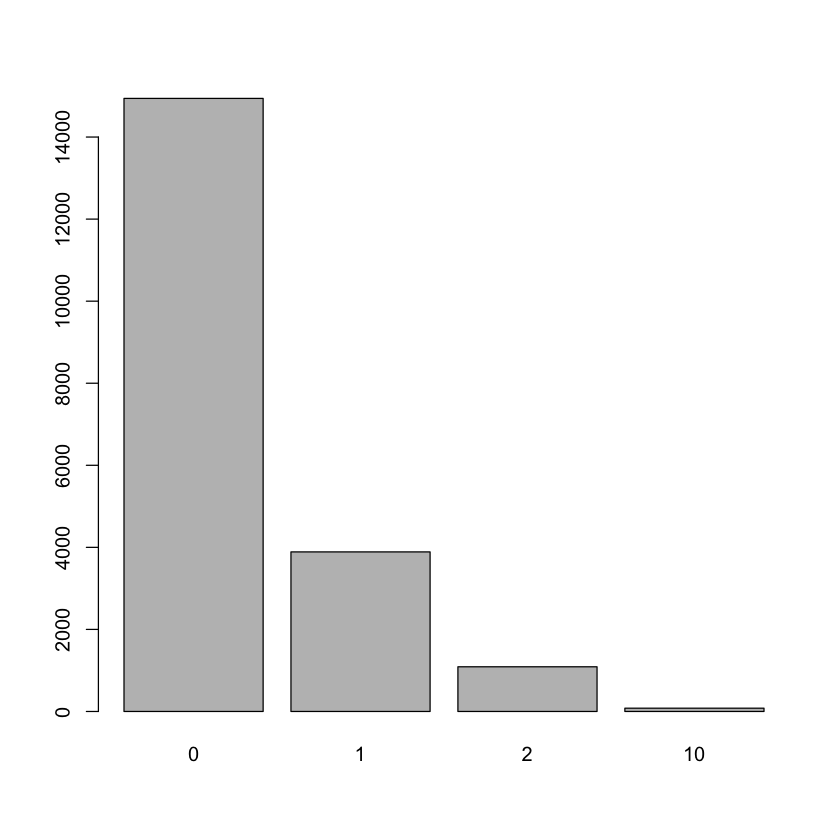

In [17]:
barplot(table(new_localizzazione_incidente))

In [18]:
tabella_pav_tipo_strada <- table(pavimentazione, new_localizzazione_incidente)
tabella_pav_tipo_strada

              new_localizzazione_incidente
pavimentazione     0     1     2    10
       good    14843  3857  1089    74
       bad        74    21     0     0
       non-pav    25    11     0     6

In [19]:
table(pavimentazione)

pavimentazione
   good     bad non-pav 
  19863      95      42 

**Considerazioni**: il numero di strade segnate come sdrucciolevoli è talmente basso da non rendere possibile un'analisi. Mi sembra comunque strano che sia così basso - bisognerebbe guardare esattamente alla definizione.

In [20]:
new_localizzazione_incidente <- factor(new_localizzazione_incidente)
levels(new_localizzazione_incidente) <- c("urbana", "extraurbana", "autostrada", "altro")

In [21]:
fondo_stradale <- factor(fondo_stradale)
levels(fondo_stradale) <- c("asciutto", "bagnato", "sdrucciolevole", "ghiacciato", "innevato")

In [22]:
tabella_fondo_tipo_strada <- table(fondo_stradale, new_localizzazione_incidente)
tabella_fondo_tipo_strada

                new_localizzazione_incidente
fondo_stradale   urbana extraurbana autostrada altro
  asciutto        13130        3190        922    69
  bagnato          1640         617        151     8
  sdrucciolevole    109          30          8     2
  ghiacciato         48          37          6     0
  innevato           15          15          2     1

In [23]:
tot_incidenti_urbani = sum(tabella_fondo_tipo_strada[,1])
tot_incidenti_extra_urbani = sum(tabella_fondo_tipo_strada[,2])
tot_incidenti_autostrada = sum(tabella_fondo_tipo_strada[,3])

In [24]:
prob_incidente = array(666, dim=c(nrow(tabella_fondo_tipo_strada), ncol(tabella_fondo_tipo_strada),3))

In [25]:
prob_incidente_per_acqua_urbano = tabella_fondo_tipo_strada[2]/tot_incidenti_urbani
cat("Probabilità incidente per fondo bagnato in strada urbana", as.integer(prob_incidente_per_acqua_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_urbano = tabella_fondo_tipo_strada[4]/tot_incidenti_urbani
cat("Probabilità incidente per fondo ghiacciato in strada urbana", as.integer(prob_incidente_per_ghiacciato_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada urbana 10.97 %
Probabilità incidente per fondo ghiacciato in strada urbana 0.32 %

In [26]:
prob_incidente_per_acqua_extra_urbano = tabella_fondo_tipo_strada[2,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo bagnato in strada extra urbana", as.integer(prob_incidente_per_acqua_extra_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_extra_urbano = tabella_fondo_tipo_strada[4,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo ghiacciato in strada extra urbana", as.integer(prob_incidente_per_ghiacciato_extra_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada extra urbana 15.86 %
Probabilità incidente per fondo ghiacciato in strada extra urbana 0.95 %

Quello che si dovrebbe ora calcolare è di andare a vedere se effettivamente questi due fenomeno sono dovuti abbastanza diversi. Ovvero devo fare un qualche test di confronto, e.g. chi-quadro. 

Ci ritorno quando sarò in grado di farlo.

Sarebbe carino mettere un plot in 3 dimensioni per mostrare le tabelle bivariate che sono state prodotte sopra.

Calcolo gli intervalli di confidenza per le probabilità calcolate sopra.

---- 
### Confidence Intervals

Con un confidence level del 95%, l'intervallo di probabilità per i vari tipi di incidente è

In [27]:
confidence_level = 0.99

In [28]:
confidence_interval_acqua_urbano =  qnorm(confidence_level+(1-confidence_level)/2) * sqrt(prob_incidente_per_acqua_urbano*(1-prob_incidente_per_acqua_urbano)/SAMPLE_SIZE)

cat("Intervallo di confidenza al", confidence_level*100,"% per incidenti su fondo bagnato in strada urbana:(", 
      as.integer(prob_incidente_per_acqua_urbano*10000)/100,"±",
        as.integer(confidence_interval_acqua_urbano*10000)/100,")%")

Intervallo di confidenza al 99 % per incidenti su fondo bagnato in strada urbana:( 10.97 ± 0.56 )%

**Nota importante** La funzione `qnorm` rimanda solamente l'inverso dell'integrale sotto la Gaussiana (ovvero il valore $Z$ associato a un certo quantile) per una coda. Ovvero, per avere uno $Z$ associato a un calcolo di intervallo, come quello che dobbiamo fare, dobbiamo fare considerazioni algebriche.

In particolare, se noi vogliamo il 95% su due cose, su una coda questo corrisponde a richiedere il 97.5% (infatti, le due code sono entrambe del 2.5%; ovvero aggiungo questo valore per vedere dove arrivo a "destra").

-----
### Analisi autostradale

Per prima cosa vado a selezionare, all'interno del mio campione, solamente i dati relativi ad autostrada.

**nota**: Tra le autostrade, configurano anche delle denominazioni tipo `R03`: sono riferiti a dei pezzi di raccordo. Cercando velocemente online si chiarisce facilmente.

La funzione `droplevels` serve per escludere tutti i livelli non utilizzati, i.e. i nomi delle strade normali.

In [29]:
incidenti_in_autostrada = sample_data[which(new_localizzazione_incidente=="autostrada"),]

In [30]:
tabella_incidenti_in_autostrada = table(droplevels(incidenti_in_autostrada$denominazione_della_strada))

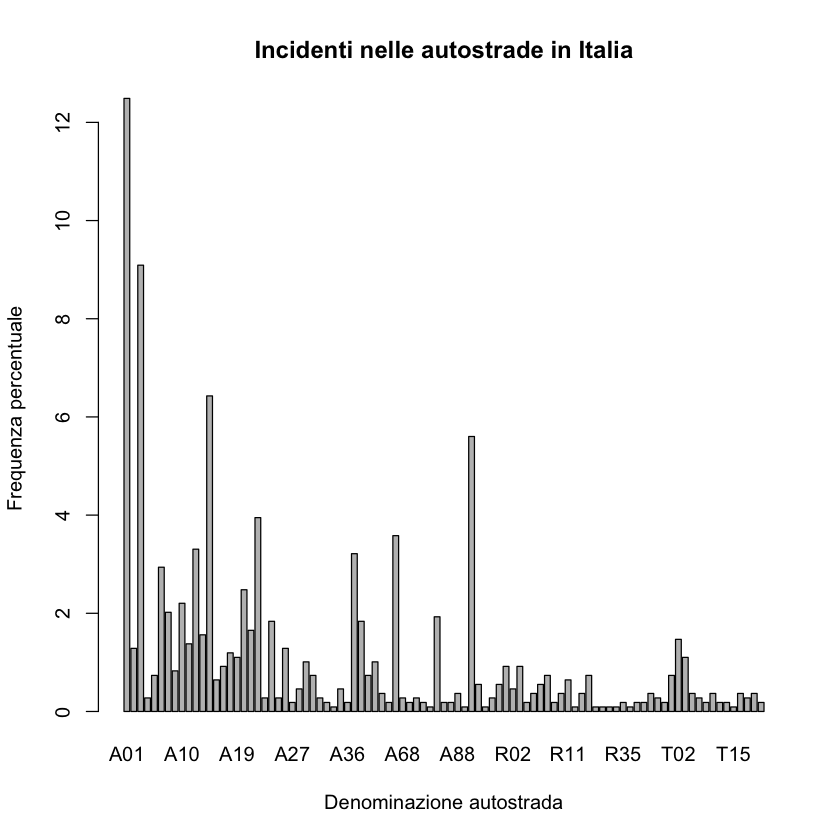

In [31]:
barplot(tabella_incidenti_in_autostrada/nrow(incidenti_in_autostrada)*100, ylab='Frequenza percentuale', xlab='Denominazione autostrada', 
        main='Incidenti nelle autostrade in Italia')

**Moda** degli incidenti in autostrada.

In [32]:
tabella_incidenti_in_autostrada.percfreq = tabella_incidenti_in_autostrada/nrow(incidenti_in_autostrada)*100
tabella_incidenti_in_autostrada.mode = which(tabella_incidenti_in_autostrada.percfreq==max(tabella_incidenti_in_autostrada.percfreq))

In [33]:
cat("L'autostrada con più incidenti in Italia nel 2017 è la", names(tabella_incidenti_in_autostrada.mode))

L'autostrada con più incidenti in Italia nel 2017 è la A01

In [34]:
library('rgdal')

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.2, released 2019/06/28
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/proj
 Linking to sp version: 1.3-1 


In [46]:
my_spdf <- readOGR( 
  dsn= paste0("../../../Downloads/GrafoANAS_dic2015/") , 
  layer="grafo_Anas",
  verbose=FALSE
)

Warning message in readOGR(dsn = paste0("../../../Downloads/GrafoANAS_dic2015/"), :
“Z-dimension discarded”

In [50]:
(my_spdf@data)

,OBJECTID,COD_STRA,COM_SIGLA,SECONDONOM,COD_COM,AMM,COD_INT,SHAPE_LEN
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<dbl>
0,151,16_1601033031,BA,SVINCOLO STADIO AEROPORTO SS7 KM 713+500,16,99,16_0000000033,44.19727
1,152,16_1601033032,BA,SVINCOLO STADIO AEROPORTO SS7 KM 713+500,16,99,16_0000000033,64.75063
2,153,16_1601033042,BA,SVINCOLO STADIO AEROPORTO SS7 KM 713+500,16,99,16_0000000033,32.95173
3,154,16_1601033050,BA,SVINCOLO STADIO AEROPORTO SS7 KM 713+500,16,99,16_0000000033,427.75246
4,155,16_1601033060,BA,SVINCOLO STADIO AEROPORTO SS7 KM 713+500,16,99,16_0000000033,448.43576
5,156,16_1601154011,BA,SVINCOLO SS16,16,99,16_0000000154,50.21564
6,157,16_1601154012,BA,SVINCOLO SS16,16,99,16_0000000154,44.80815
7,158,16_1601154013,BA,SVINCOLO SS16,16,99,16_0000000154,39.27786
8,159,16_1601154014,BA,SVINCOLO SS16,16,99,16_0000000154,116.62738


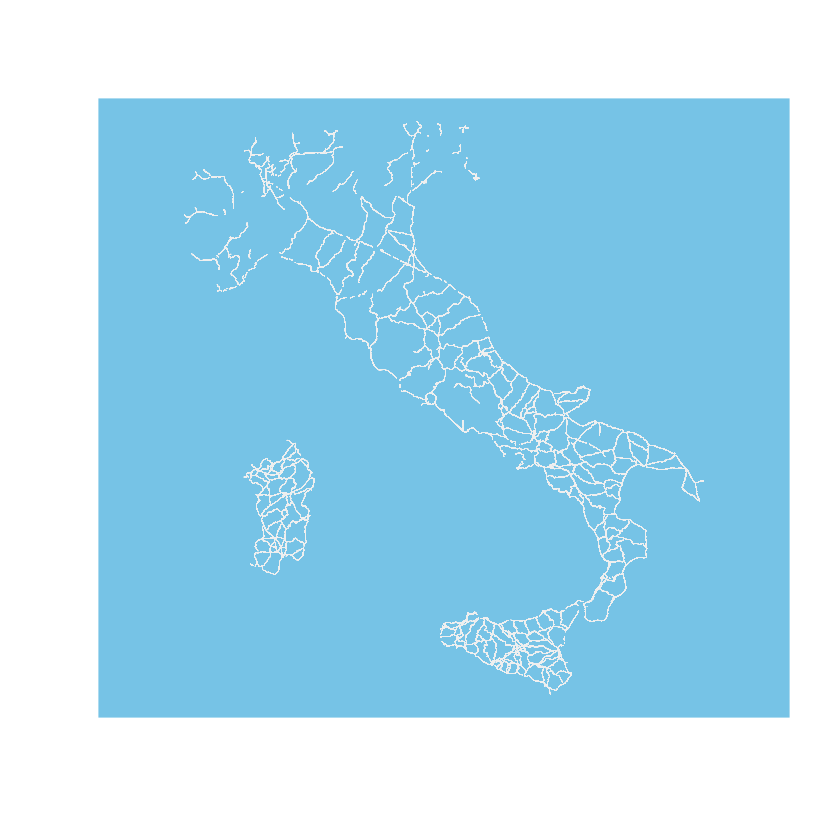

In [48]:
plot(my_spdf, col="#f2f2f2", bg="skyblue", lwd=0.25)

Sono riuscito a trovare come poter collegare il nome dell'autostrada. Online sono inoltre presenti i dati geografici (si chiamano _shapefile_) relativi alle autostrade. Penso che, una volta capito quello che si deve fare, non sia difficile riportare questi dati su una mappa geografica.

Servono ovviamente le apposite mappe.

### Sesso nel numero di incidenti.

Provo a fare una veloce analisi per vedere se ci sono più incidenti quando sono presenti donne o meno.

In [34]:
# Sostituisco i Nan con dei 3
veicolo__a___sesso_conducente[is.na(veicolo__a___sesso_conducente)] <- 3

In [35]:
veicolo__a___sesso_conducente <- factor(veicolo__a___sesso_conducente)
levels(veicolo__a___sesso_conducente) <- c("Maschio", "Femmina","Sconosciuto")

In [36]:
tabella_veicolo__a__sesso_conducente = table(veicolo__a___sesso_conducente)
tabella_veicolo__a__sesso_conducente

veicolo__a___sesso_conducente
    Maschio     Femmina Sconosciuto 
      14674        5221         105 

In [37]:
# Calcolo frequenze
tabella_veicolo__a__sesso_conducente.relfreq <- tabella_veicolo__a__sesso_conducente/length(veicolo__a___sesso_conducente)
tabella_veicolo__a__sesso_conducente.percfreq <- tabella_veicolo__a__sesso_conducente.relfreq*100

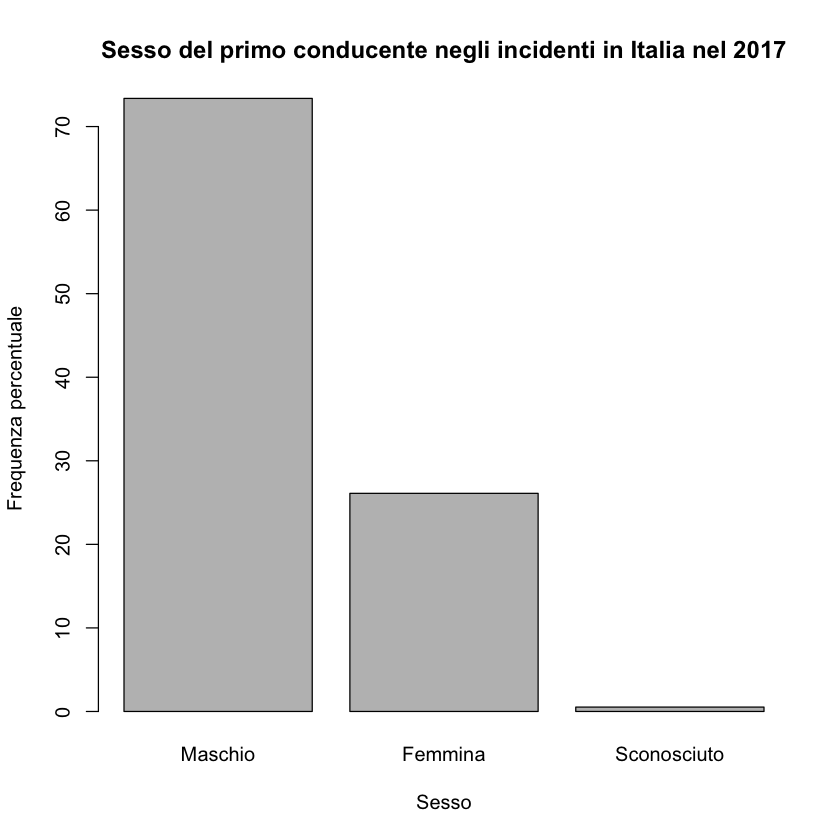

In [38]:
barplot(tabella_veicolo__a__sesso_conducente.percfreq, xlab='Sesso', ylab='Frequenza percentuale', main='Sesso del primo conducente negli incidenti in Italia nel 2017')

In [39]:
# Sostituisco i Nan con dei 3
veicolo__b___sesso_conducente[is.na(veicolo__b___sesso_conducente)] <- 3

In [40]:
veicolo__b___sesso_conducente <- factor(veicolo__b___sesso_conducente)
levels(veicolo__b___sesso_conducente) <- c("Maschio", "Femmina", "Sconosciuto")

In [41]:
tabella_veicolo__b__sesso_conducente = table(veicolo__b___sesso_conducente)
tabella_veicolo__b__sesso_conducente

veicolo__b___sesso_conducente
    Maschio     Femmina Sconosciuto 
      10799        3598        5603 

In [42]:
# Calcolo frequenze
tabella_veicolo__b__sesso_conducente.relfreq <- tabella_veicolo__b__sesso_conducente/length(veicolo__b___sesso_conducente)
tabella_veicolo__b__sesso_conducente.percfreq <- tabella_veicolo__b__sesso_conducente.relfreq*100

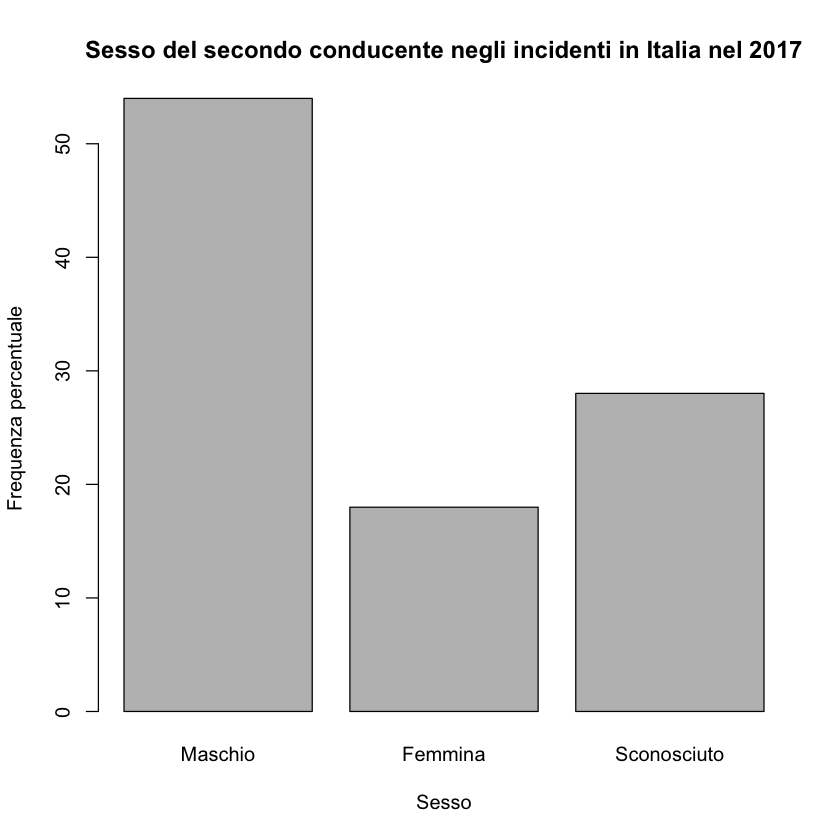

In [43]:
barplot(tabella_veicolo__b__sesso_conducente.percfreq, xlab='Sesso', ylab='Frequenza percentuale',
        main='Sesso del secondo conducente negli incidenti in Italia nel 2017')

Vado a prendere tutti quegli incidenti in cui si ha che è presente una donna come conducente, o sul primo o sul secondo veicolo.

In [44]:
incidenti_con_almeno_una_donna = sample_data[which(veicolo__a___sesso_conducente=="Femmina" | veicolo__b___sesso_conducente=="Femmina"),]

In [45]:
nrow(incidenti_con_almeno_una_donna)

[1] 7693

In [46]:
incidenti_con_almeno_un_uomo = sample_data[which(veicolo__a___sesso_conducente=="Maschio" |  veicolo__b___sesso_conducente=="Maschio"),]

In [47]:
nrow(incidenti_con_almeno_un_uomo)

[1] 17427

-----

-----

In [52]:
incidenti_uomo_donna_confronto = as.table(c(nrow(incidenti_con_almeno_una_donna),nrow(incidenti_con_almeno_un_uomo)))
rownames(incidenti_uomo_donna_confronto) = c("Almeno una donna", "Almeno un uomo")

In [53]:
incidenti_solo_sconosciuti = sample_data[which(veicolo__a___sesso_conducente=="Sconosciuto" & veicolo__b___sesso_conducente=="Sconosciuto"),]
nrow(incidenti_solo_sconosciuti)

[1] 58

Il grafico qua sotto rappresenta la probabilità che un uomo e una donna siano coinvolti in un incidente, in generale. 

Questo risultato non è però pesato sul numero di patenti.

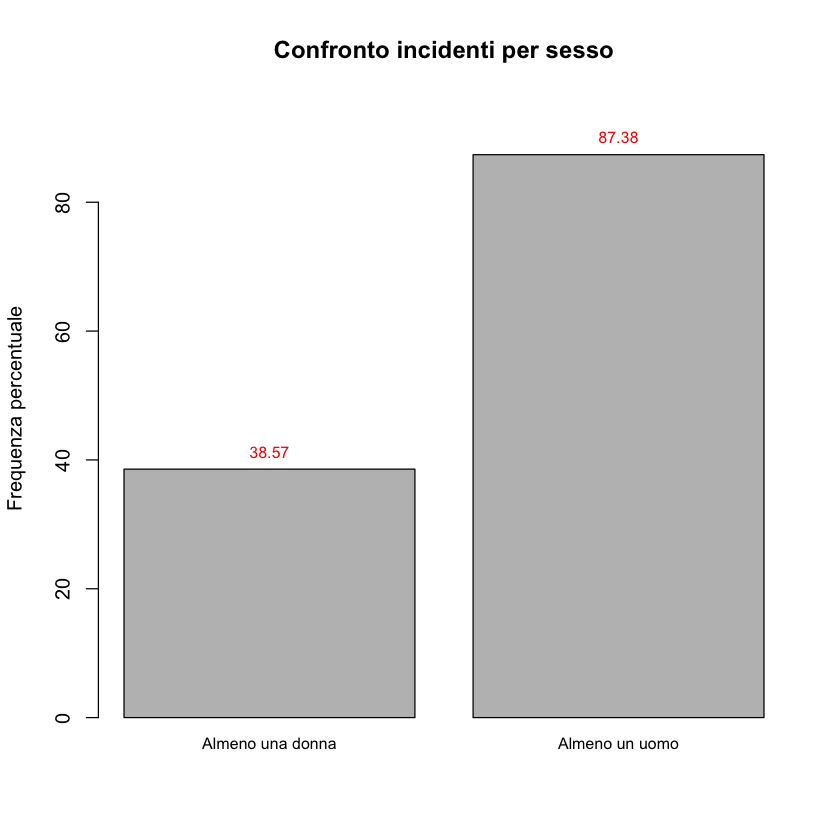

In [54]:
incidenti_uomo_donna_confronto.percfreq <- as.numeric(as.character(as.integer(incidenti_uomo_donna_confronto/(SAMPLE_SIZE - nrow(incidenti_solo_sconosciuti))*10000)/100))
ylim <- c(0, 1.1*max(incidenti_uomo_donna_confronto.percfreq))
xx <- barplot(incidenti_uomo_donna_confronto.percfreq, xaxt = 'n', xlab = '', width = 0.85, ylim = ylim,
              main = "Confronto incidenti per sesso", 
              ylab = "Frequenza percentuale")
text(x = xx, y = incidenti_uomo_donna_confronto.percfreq,
     label = incidenti_uomo_donna_confronto.percfreq,
     pos = 3, cex = 0.8, col = "red")
axis(1, at=xx, labels=c("Almeno una donna", "Almeno un uomo"), tick=FALSE, las=1, line=-0.5, cex.axis=0.8)

Da questa tabella si deduce che la probabilità che una donna sia coinvolta in un incidente è del 40%, mentre quella che un uomo ne sia coinvolto è del 90%.

Ovviamente le due probabilità non sono mutualmente esclusive: il fatto che ci sia un uomo in un incidente, non impedisce che l'altro conducente non sia donna. Ovvero ci sono una serie di incidente `uomo-donna`. 

Poiché questi risultati non sono pesati per il numero di persone, non indicano effettivamente quale tra i due sessi sia più pericoloso. Per poter avere accesso a questa informazione, bisogna pesare i risultati sul numero di patenti per sesso.

-------------

Provo a fare un rapporto tra le frequenze di queste tabelle e il numero di patentati per sesso.

Carico qua sotto le informazioni su tutte le patenti presenti in Italia, divise per regioni.

**Info** Ci mette l'eternità ad aprire tutti questi file.

In [55]:
patenti_Abruzzo <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Abruzzo.csv", sep=',')

In [56]:
patenti_Basilicata <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Basilicata.csv", sep=',')

In [57]:
patenti_Calabria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Calabria.csv", sep=',')

In [58]:
patenti_Campania <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Campania.csv", sep=',')

In [59]:
patenti_EmiliaRomagna <- read.csv("dataset/informazioni_patenti_per_regione/patenti_EmiliaRomagna.csv", sep=',')

In [60]:
patenti_FriuliVeneziaGiulia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_FriuliVeneziaGiulia.csv", sep=',')

In [61]:
patenti_Lazio <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Lazio.csv", sep=',')

In [62]:
patenti_Liguria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Liguria.csv", sep=',')

In [63]:
patenti_Liguria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Liguria.csv", sep=',')

In [64]:
patenti_Lombardia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Lombardia.csv", sep=',')

In [65]:
patenti_Marche <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Marche.csv", sep=',')

In [66]:
patenti_Molise <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Molise.csv", sep=',')

In [67]:
patenti_Piemonte <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Piemonte.csv", sep=',')

In [68]:
patenti_Puglia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Puglia.csv", sep=',') 

In [69]:
patenti_Sardegna <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Sardegna.csv", sep=',') 

In [70]:
patenti_Sicilia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Sicilia.csv", sep=',') 

In [71]:
patenti_Toscana <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Toscana.csv", sep=',') 

In [72]:
patenti_TrentinoAltoAdige <- read.csv("dataset/informazioni_patenti_per_regione/patenti_TrentinoAltoAdige.csv", sep=',') 

In [73]:
patenti_Umbria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Umbria.csv", sep=',') 

In [74]:
patenti_ValleAosta <- read.csv("dataset/informazioni_patenti_per_regione/patenti_ValleAosta.csv", sep=',') 

In [75]:
patenti_Veneto <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Veneto.csv", sep=',') 

In [76]:
patenti_femmine = length(which(patenti_Abruzzo$sesso=="F")) + length(which(patenti_Basilicata$sesso=="F")) + length(which(patenti_Calabria$sesso=="F")) + length(which(patenti_Campania$sesso=="F")) + length(which(patenti_EmiliaRomagna$sesso=="F")) + length(which(patenti_FriuliVeneziaGiulia$sesso=="F")) + length(which(patenti_Lazio$sesso=="F")) + length(which(patenti_Liguria$sesso=="F")) + length(which(patenti_Lombardia$sesso=="F")) + length(which(patenti_Marche$sesso=="F")) + length(which(patenti_Molise$sesso=="F")) + length(which(patenti_Piemonte$sesso=="F")) + length(which(patenti_Puglia$sesso=="F")) + length(which(patenti_Sardegna$sesso=="F")) + length(which(patenti_Sicilia$sesso=="F")) + length(which(patenti_Toscana$sesso=="F")) + length(which(patenti_TrentinoAltoAdige$sesso=="F")) + length(which(patenti_Umbria$sesso=="F")) + length(which(patenti_ValleAosta$sesso=="F")) + length(which(patenti_Veneto$sesso=="F"))
patenti_femmine 

[1] 17157632

In [77]:
patenti_maschi = length(which(patenti_Abruzzo$sesso=="M")) + length(which(patenti_Basilicata$sesso=="M")) + length(which(patenti_Calabria$sesso=="M")) + length(which(patenti_Campania$sesso=="M")) + length(which(patenti_EmiliaRomagna$sesso=="M")) + length(which(patenti_FriuliVeneziaGiulia$sesso=="M")) + length(which(patenti_Lazio$sesso=="M")) + length(which(patenti_Liguria$sesso=="M")) + length(which(patenti_Lombardia$sesso=="M")) + length(which(patenti_Marche$sesso=="M")) + length(which(patenti_Molise$sesso=="M")) + length(which(patenti_Piemonte$sesso=="M")) + length(which(patenti_Puglia$sesso=="M")) + length(which(patenti_Sardegna$sesso=="M")) + length(which(patenti_Sicilia$sesso=="M")) + length(which(patenti_Toscana$sesso=="M")) + length(which(patenti_TrentinoAltoAdige$sesso=="M")) + length(which(patenti_Umbria$sesso=="M")) + length(which(patenti_ValleAosta$sesso=="M")) + length(which(patenti_Veneto$sesso=="M"))
patenti_maschi

[1] 21536167

In [78]:
tabella_patenti = as.table(c(patenti_maschi,patenti_femmine))

In [79]:
rownames(tabella_patenti) = c("Maschi", "Femmine")

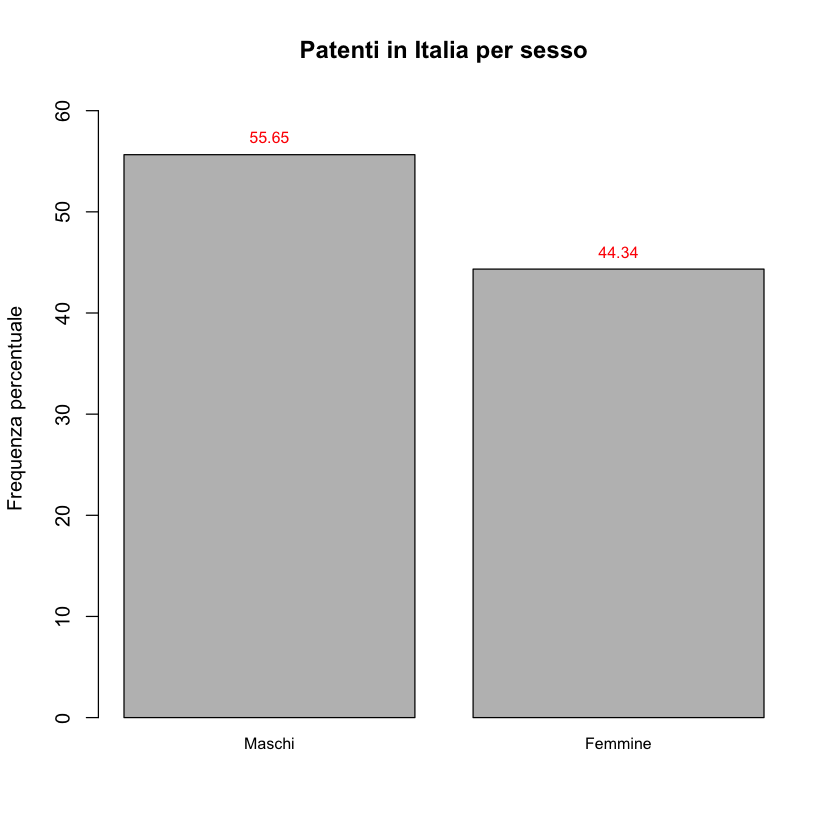

In [80]:
tabella_patenti.percfreq <- as.numeric(as.character(as.integer(tabella_patenti/(tabella_patenti[1]+tabella_patenti[2])*10000)/100))
ylim <- c(0, 1.1*max(tabella_patenti.percfreq))
xx <- barplot(tabella_patenti.percfreq, xaxt = 'n', xlab = '', width = 0.85, ylim = ylim,
              main = "Patenti in Italia per sesso", 
              ylab = "Frequenza percentuale")
text(x = xx, y = tabella_patenti.percfreq,
     label = tabella_patenti.percfreq,
     pos = 3, cex = 0.8, col = "red")
axis(1, at=xx, labels=c("Maschi", "Femmine"), tick=FALSE, las=1, line=-0.5, cex.axis=0.8)

Non sono sicuro che l'analisi sia giusta, ma qua sotto metto il risultato del mio obiettivo, ovvero il rapporto tra gli incidenti con donne e uomini e il numero di guidatori in Italia.

In [81]:
incidenti_femmine_pesato = nrow(incidenti_con_almeno_una_donna) / patenti_femmine 
incidenti_femmine_pesato

[1] 0.0004483719

In [82]:
incidenti_maschi_pesato = nrow(incidenti_con_almeno_un_uomo) / patenti_maschi 
incidenti_maschi_pesato

[1] 0.0008091969

Voglio mostrare che vi sia indipendenza statistica o meno tra questi due risultati. 

In [87]:
prob_incidente_femmina = incidenti_femmine_pesato / (incidenti_femmine_pesato + incidenti_maschi_pesato)
prob_incidente_femmina

[1] 0.3565387

In [90]:
prob_incidente_maschio = incidenti_maschi_pesato / (incidenti_maschi_pesato + incidenti_femmine_pesato)
prob_incidente_maschio

[1] 0.6434613

-----

-----
-----
----

## Regioni Italiane

Provo a fare una mappa con numero di incidenti per Regione in Italia.

* Per prima cosa, trasformo i dati relativi alle province in dati relativi alle regioni.

In [82]:
incidenti_per_provincia <- provincia

In [131]:
tabella_incidenti_per_provincia <- table(incidenti_per_provincia)
tabella_incidenti_per_provincia

incidenti_per_provincia
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 653   35  113  124   51  163   33  119  145  604  117  299  192   48 1605  344 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 372  189  114  132  199  164  362  220   52  255  258  311   85  137   49  136 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 117  168  196  307  416  136  182  196  156  200  117  110   96  222  134  606 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 164  203  122   96   96  178   79   64   40 1880  178   96  157   37  610   44 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 302   71   80   76   74   44  134  382  141  133  183   51   52  110   85  121 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 152  361  177   59   59   23  323   86   94  156   39  117   88   12   24   43 
  97

In [96]:
incidenti_per_regione = array(666, length(incidenti_per_provincia))

In [174]:
for(i in 1:20000)
{

    if(incidenti_per_provincia[i] > 0 & incidenti_per_provincia[i] < 7 | incidenti_per_provincia[i] == 96 | incidenti_per_provincia[i] == 103)
    {
        incidenti_per_regione[i] = 1


    }

     if(incidenti_per_provincia[i] == 7)
    {
        incidenti_per_regione[i] = 2

    }
    

     if(incidenti_per_provincia[i] > 7 & incidenti_per_provincia[i] < 12)
    {
        incidenti_per_regione[i] = 7

    }    


     if(incidenti_per_provincia[i] > 11 & incidenti_per_provincia[i] < 21 | incidenti_per_provincia[i] == 97 | incidenti_per_provincia[i] == 98 | incidenti_per_provincia[i] == 108)
    {
        incidenti_per_regione[i] = 3

    }    
    

     if(incidenti_per_provincia[i] == 21 | incidenti_per_provincia[i] == 22)
    {
        incidenti_per_regione[i] = 4

    }    
    

     if(incidenti_per_provincia[i] > 22 & incidenti_per_provincia[i] < 30)
    {
        incidenti_per_regione[i] = 5

    }    
    

     if(incidenti_per_provincia[i] > 29 & incidenti_per_provincia[i] < 33 | incidenti_per_provincia[i] == 93)
    {
        incidenti_per_regione[i] = 6

    }    
    

     if(incidenti_per_provincia[i] > 32 & incidenti_per_provincia[i] < 41 | incidenti_per_provincia[i] == 99)
    {
        incidenti_per_regione[i] = 8

    }    
    

     if(incidenti_per_provincia[i] > 40 & incidenti_per_provincia[i] < 45 | incidenti_per_provincia[i] == 109)
    {
        incidenti_per_regione[i] = 11

    }
    

     if(incidenti_per_provincia[i] > 44 & incidenti_per_provincia[i] < 54 | incidenti_per_provincia[i] == 100)
    {
        incidenti_per_regione[i] = 9

    }    


     if(incidenti_per_provincia[i] ==54 | incidenti_per_provincia[i] == 55)
    {
        incidenti_per_regione[i] = 10

    }    
    

     if(incidenti_per_provincia[i] > 55 & incidenti_per_provincia[i] < 61)
    {
        incidenti_per_regione[i] = 12

    }    
    

     if(incidenti_per_provincia[i] > 60 & incidenti_per_provincia[i] < 66)
    {
        incidenti_per_regione[i] = 15

    }    
    

     if(incidenti_per_provincia[i] > 65 & incidenti_per_provincia[i] < 70)
    {
        incidenti_per_regione[i] = 13

    }    
    

     if(incidenti_per_provincia[i] == 70 | incidenti_per_provincia[i] == 94)
    {
        incidenti_per_regione[i] = 14

    }    
    

     if(incidenti_per_provincia[i] > 70 & incidenti_per_provincia[i] < 76 | incidenti_per_provincia[i] == 110)
    {
        incidenti_per_regione[i] = 16

    }
    

     if(incidenti_per_provincia[i] == 76 | incidenti_per_provincia[i] == 77)
    {
        incidenti_per_regione[i] = 17

    }    
    

     if(incidenti_per_provincia[i] > 77 & incidenti_per_provincia[i] < 81 | incidenti_per_provincia[i] == 101 | incidenti_per_provincia[i] == 102)
    {
        incidenti_per_regione[i] = 18

    }    
    

     if(incidenti_per_provincia[i] > 80 & incidenti_per_provincia[i] < 90)
    {
        incidenti_per_regione[i] = 19

    }    
    

     if(incidenti_per_provincia[i] > 89 & incidenti_per_provincia[i] < 93 | incidenti_per_provincia[i] == 95 | incidenti_per_provincia[i] == 111)
    {
        incidenti_per_regione[i] = 20

    }    
    
}

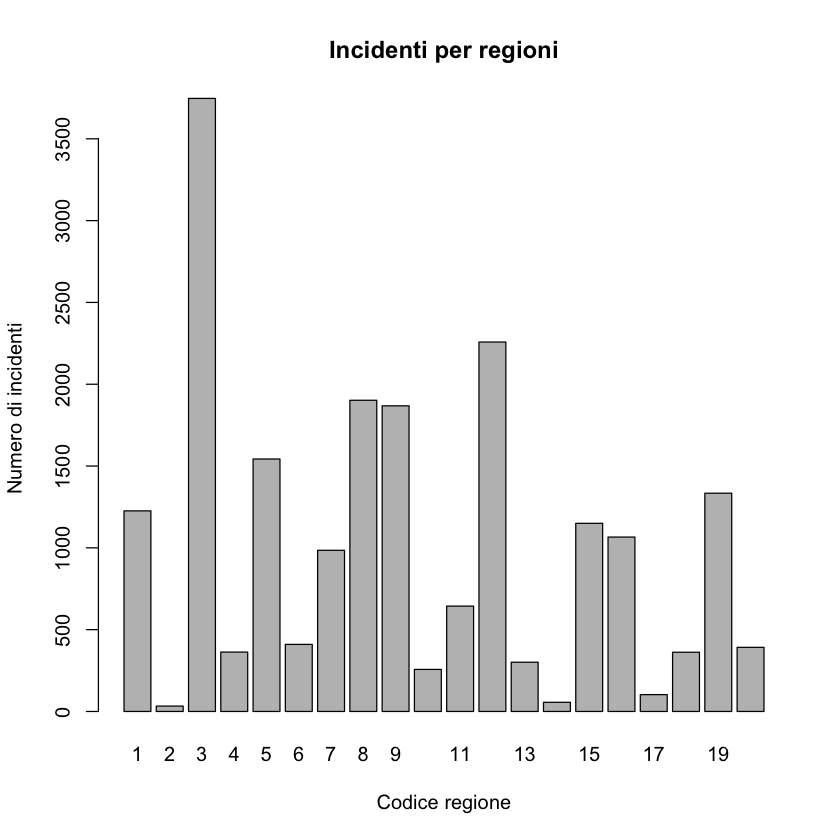

In [177]:
barplot(table(incidenti_per_regione), main="Incidenti per regioni", ylab="Numero di incidenti", xlab='Codice regione')

In [179]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [229]:
geo_regioni <- readOGR( 
  dsn= paste0("../../../Downloads/Limiti01012017_g/Reg01012017_g/") , 
  layer="Reg01012017_g_WGS84",
  verbose=FALSE
)

In [230]:
# Controllo che i codici delle regioni combacino
geo_regioni$COD_REG %in% incidenti_per_regione

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

In [231]:
geo_regioni@data <- cbind(geo_regioni@data, as.array(table(incidenti_per_regione)/SAMPLE_SIZE))

drop <- c("incidenti_per_regione")
geo_regioni@data = geo_regioni@data[,!(names(geo_regioni@data) %in% drop)]

In [269]:
geo_regioni@data

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,Freq
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
0,1,1,Piemonte,1235676.2,25393876361,0.06130
1,1,2,Valle d'Aosta/Vallée d'Aoste,311139.3,3258906689,0.00165
2,1,3,Lombardia,1410509.0,23862231896,0.18735
3,2,4,Trentino-Alto Adige/Südtirol,800893.7,13607548177,0.01815
4,2,5,Veneto,1058649.9,18405751538,0.07715
5,2,6,Friuli-Venezia Giulia,669663.8,7863906353,0.02050
6,1,7,Liguria,825467.9,5415023333,0.04925
7,2,8,Emilia-Romagna,1163681.7,22450247101,0.09510
8,3,9,Toscana,1306388.9,22982447617,0.09340


In [266]:
dataset_pop <- read.csv("../../popolazione.csv", sep=',')
dataset_pop$X = geo_regioni$COD_REG

In [268]:
dataset_pop

X,Regione,Popolazione
<fct>,<fct>,<fct>
1,Lombardia,10.060.574
2,Lazio,5.879.082
3,Campania,5.801.692
4,Sicilia,4.999.891
5,Veneto,4.905.854
6,Emilia-Romagna,4.459.477
7,Piemonte,4.356.406
8,Puglia,4.029.053
9,Toscana,3.729.641


In [261]:
geo_regioni$Incidenti_per_10000_abitanti  <-  geo_regioni$Freq / SAMPLE_SIZE * length(dataset_proj) /  dataset_pop$Popolazione

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: geo_regioni$Freq  <-  geo_regioni$Freq /
   ^


In [262]:
library(tmap)

In [263]:
pdf("results/incidenti_per_regioni.pdf")
qtm(geo_regioni, "Freq")
dev.off()

Warning message:
“The shape geo_regioni is invalid. See sf::st_is_valid”

pdf 
  2

Per completare questa analisi, mi manca solamente di dividere la frequenza relativa di incidenti per regione con la popolazione della suddetta regione.

* Devo un attimo capire come ottenere qualcosa del tipo "incidenti ogni 1000 abitanti".

     L'unico modo sarebbe quello di dividere le frequenze relative per la popolazione della regione e moltiplicare per il numero totale di incidenti in Italia. (Ho controllato e matematicamente è corretto)